## 基于网站API的爬虫编写

1. 在网站注册开发者账户用户名，获得相应的开发者密钥
   （通常不通过用户名密码也可以访问，但一般会有流量的限制）
2. 在网站的API帮助说明文档中找到自己需要使用的API
   - 确认API请求的限制次数
   - 确认调用API需要使用的参数
3. 在联网状态下，编写代码正确调用该API
4. 从API返回的内容（常见为JSON格式）中获取所需属性
5. 将获取的内容存储到本地（文件或数据库）

## Json
> JavaScript Object Notation（在网络中交换数据最常见的格式之一）

In [9]:
# 豆瓣电影API举例
# Python中对URL的访问：uillib
# decode:utf8 / unicode-escape
# --------------------------------核心代码----------------------------- #
import urllib.request as urlrequest
url_visit = 'https://api.douban.com/v2/movie/26387939'
crawl_content = urlrequest.urlopen(url_visit).read()
print(crawl_content.decode('utf8'))

{"rating": {"max": 10, "average": "9.1", "numRaters": 465793, "min": 0}, "author": [{"name": "\u6d85\u63d0\u00b7\u8482\u74e6\u91cc Nitesh Tiwari"}], "alt_title": "\u6454\u8de4\u5427\uff01\u7238\u7238 \/ \u6211\u548c\u6211\u7684\u51a0\u519b\u5973\u513f(\u53f0)", "image": "https://img3.doubanio.com\/view\/photo\/s_ratio_poster\/public\/p2457983084.jpg", "title": "Dangal", "summary": "\u9a6c\u54c8\u7ef4\u4e9a\uff08\u963f\u7c73\u5c14\u00b7\u6c57 Aamir Khan \u9970\uff09\u66fe\u7ecf\u662f\u4e00\u540d\u524d\u9014\u65e0\u91cf\u7684\u6454\u8de4\u8fd0\u52a8\u5458\uff0c\u5728\u653e\u5f03\u4e86\u804c\u4e1a\u751f\u6daf\u540e\uff0c\u4ed6\u6700\u5927\u7684\u9057\u61be\u5c31\u662f\u6ca1\u6709\u80fd\u591f\u66ff\u56fd\u5bb6\u8d62\u5f97\u91d1\u724c\u3002\u9a6c\u54c8\u7ef4\u4e9a\u5c06\u8fd9\u4efd\u5e0c\u671b\u5bc4\u6258\u5728\u4e86\u5c1a\u672a\u51fa\u751f\u7684\u513f\u5b50\u8eab\u4e0a\uff0c\u54ea\u77e5\u9053\u59bb\u5b50\u63a5\u8fde\u7ed9\u4ed6\u751f\u4e86\u4e24\u4e2a\u5973\u513f\uff0c\u53d6\u540d\u5409\u5

In [10]:
# Python中对Json的操作：json
# --------------------------------核心代码----------------------------- #
import json
json_content = json.loads(crawl_content.decode('utf8'))
rating = json_content['rating']['average']
print(rating)

# Python的写文件操作
# 'a'：在原文件末添加内容   'w'：清空原文件内容，再添加
id = 26387939
with open('movie_score.txt','w') as output:
    output.write('{} {}\n'.format(id,rating))

9.1


In [45]:
# 批量爬取进文本
# 26387939：摔跤吧，爸爸
# 11803087：异形
# 20451290：新木乃伊

import urllib
import urllib.request as urlrequest
import json

id_name = ['摔跤吧', '异形','东西']

with open('movie_scores.txt','w') as output:
    for name in id_name:
        # 将中文名转换为网页链接中能够读取的编码
        url_name = urllib.parse.quote(name)
        url = 'http://api.douban.com/v2/movie/search?q={}'.format(url_name)
        url_content = urlrequest.urlopen(url).read()
        json_content = json.loads(url_content.decode('utf8'))
        # print(json_content)
        count_list = json_content['total']
        # print (json_content['total'])
        #print(count_list)
        
        if count_list >= 19:
            count_list = 20
            
        for i in range(count_list):
            movie_id = json_content['subjects'][i]['id']
            movie_name = json_content['subjects'][i]['title']
            movie_score = json_content['subjects'][i]['rating']['average']
            movie_year = json_content['subjects'][i]['year']
            # print (i)
            i = i+1
            # print('id:{} name:{} year:{} score:{}\n'.format(movie_id, movie_name, movie_year, movie_score))
            output.write('id:{} name:[{}] year:{} score:{}\n'.format(movie_id, movie_name, movie_year, movie_score))

# 遗留问题：1. API subjects array范围0-19,超出该范围报错且无法读取后续
#           2. 豆瓣API如何精确匹配电影名和年份

## 基于网页的爬虫

### HTML常用标签介绍

> HTML:Hyper Text Markup Language
  文件扩展名为 .html 或 .htm

1. Hyperlink：超链接
2. Image：图片
3. List：列表
4. Table：表格
5. Form：表单

### HTML文件结构

1. HTML由标签组成，由`<html>`开始,`</html>`结束
2. HTML文件一开始通过<!DOCTYPE html ...>指明HTML的版本信息
   - `<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN">`
   - HTML 4.0是1997年定为W3C（World Wide Web Consortium）推荐标准
   - 最新的HTML5于2014年定为W3C推荐标准
3. 标签可以嵌套在另一个标签之内
4. 标签可以具有属性
   - `<img src= "logo.jpg" alt= "logo" />`
5. 注释
   - `<!-- this is comment -->`
   
#### 超连接 `<a>`

1. 指向同一服务器同一目录下的 form.html 
   - `<a href="form.html">Fill Our Form</a>`
2. 指向同一服务器父目录下的parent.html 
   - `<a href="`<font color=#FF69B4 ><strong>..</strong> </font>`/parent.html">Parent</a>`
3. 指向同一服务器子目录stuff下的cat.html 
   - `<a href="`<font color=#FF69B4 font-weight:bold><strong>stuff</strong></font>`/cat.html">Catalog</a>`
4. 指向外部网站
   - `<a href="http://www.devbg.org"` <font color=#FF69B4><strong>target</strong></font>`="_blank">BASD</a>`
   
##### 超链接除了指向一个文件，还可以具体指明位置，这样浏览器就会直接跳转显示文件的相应位置
5. 指向同一文件的其他位置
   ```
   <a href="#section1">Go to Introduction</a>
   ...
   <h2 id="section1">Introduction</h2>
   ```
6. 指向其他文件的某个位置
   ```
   <a href="chapter3.html#section3.1.1">Go to Section 3.1.1</a>
   <!-- In chapter3.html ``>
   ...
   <div id="section3.1.1">
     <h3>3.1.1. Technical Background</h3>
   </div>
   ```
   
#### 图片`<img>`

1. 插入一张图片 `<img src="php.png" alt="PHP Logo" />`
2. 图片的属性 
   - src：图片路径
   - alt：图片无法显示、或用户禁用图片时的替代文本
   - height：高度
   - width：宽度
   - border：边框宽度，0表示无边框
3. 图片作为超链接
   `<a href="apply-now.html"><img src="apply-now-button.jpg" /></a>`
   
#### 列表
1. 无序列表 `<ul>+<li>`  
> ul:unordered list / li:list item
   - 咖啡
   - 茶
   - 牛奶  
   
   代码示例：

   ```
   <!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN">
   <html>
   <head>
   <meta charset="UTF-8">  <!-- 中文需要在head中指定编码，否则乱码 -->
   <title>Unordered List</title>
   </head>
   <body>
       <ul>
          <li>咖啡</li>
          <li>茶</li>
          <li>牛奶</li>
       </ul>
   </body>
   </html>
   ```
   
2. 有序列表 `<ol>+<li>`
> ol:ordered list  
   1.咖啡  
   2.茶  
   3.牛奶   
   50.咖啡  
   51.牛奶  
   52.茶  
   
   代码示例：

   ```
   <!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN">
   <html>
   <head>
   <meta charset="UTF-8">  <!-- 中文需要在head中指定编码，否则乱码 -->
   <title>Unordered List</title>
   </head>
   <body>
       <ol>
          <li>咖啡</li>
          <li>茶</li>
          <li>牛奶</li>
       </ol>
       <ol strat="50">     <!-- start属性可指明起始值 -->
          <li>咖啡</li>
          <li>牛奶</li>
          <li>茶</li>
       </ol>
   </body>
   </html>
   ```

   
#### 表格
##### HTML表格由多种标签组合而成，其中最重要的三种标签是：
1. `<table></table>`：表格的开始和结束
2. `<tr></tr>`：创建表格的一行
3. `<td></td>`：创建表格中普通单元格
4. `<th></th>`：创建表格中标题栏单元格

代码示例：

   ```
   <table border="1">
   <tr>
       <th>First Name</th>
       <th>Last Name</th>
       <th>Age</th>
   </tr>
   <tr>
       <th>Jill</th>
       <th>Smith</th>
       <th>50</th>
   </tr>
   <tr>
       <th>Eve</th>
       <th>Jackson</th>
       <th>94</th>
   </tr>
   <tr>
       <th>John</th>
       <th>Doe</th>
       <th>80</th>
   </tr>
  ```  
  
示例效果：  
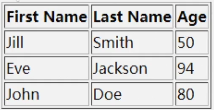

##### `<table>`的两个重要属性
1. cellspacing：定义单元格之间的空间
2. cellpadding：定义单元格内文字和边缘的空间

代码示例：
   ```
    <body>
      <table border="1" cellspacing="15" cellpadding="0">
          <tr>
              <td>First</td>
              <td>Second</td>
          </tr>
      </table>
    </body>
   ```
示例效果：  
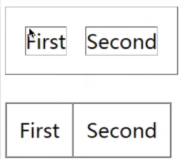

##### `<td>`的两个重要属性
1. colspan：定义这个单元格跨多少<font color=#FF69B4 font-weight:bold><strong>列</strong></font>
2. rowspan：定义这个单元格跨多少<font color=#FF69B4 font-weight:bold><strong>行</strong></font>  

代码示例：
  ```
   <!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN">
   <html>
   <head>
   <meta charset="UTF-8">  <!-- 中文需要在head中指定编码，否则乱码 -->
   <title>Table row/colspan</title>
   </head>
   <body>
       <table border="1" cellspacing="0" cellpadding="5">
           <tr class="1">
               <td>Cell[1,1]</td>
               <td colspan="2">Cell[2,1]</td>
           </tr>
           <tr class="2">
               <td>Cell[1,2]</td>
               <td rolspan="2">Cell[2,2]</td>
               <td>Cell[3,2]</td>
           </tr>
           <tr class="3">
               <td>Cell[1,3]</td>
               <td>Cell[2,3]</td>
           </tr>
         </table>
   </body>
   </html>
   ```
示例效果：  
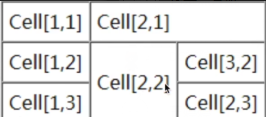

#### 表单
表单可用于采集浏览者的输入信息
- `<form name="myForm" method="`<font color=#FF69B4 font-weight:bold>post</font>`" action="`<font color=#FF69B4 font-weight:bold>formServlet</font>`">`  
  
  
1. method中指明post（注册内容/输入密码时使用，上传给服务器的链接中无法看出上传的内容究竟是什么）或get方法（上传自己表单中的信息给服务器，上传的所有信息都会encode在上传的link里，就是说我们在link里面通常会有一个?+ID=属性值的方式）
2. action中指明服务器用于处理表单提交数据的链接地址，主要指服务器究竟使用哪一个程序和脚本来处理用户输入的信息（在Java服务器端就是Servlet的对应地址）

##### 下拉框 `<selecel>+<option>`
代码示例：
  ```
  <label for="degree">Degree</label>
  <select name="degree" id="degree">
      <option value="BA">Bachelor of Art</option>
      <option value="BS">Bachelor of Science</option>
      <option value="MBA" selected="selected">Master of Business Administration</option>
  </select>
  ```
1. label的for属性用来指明这个标签是对应哪个表单域的
2. name是表单在上传数据时的属性名称（键值）
   > <font color=#FF69B4 font-weight:bold><strong>name vs id</strong></font>  ：  
   name属性用在表单提交时传送的属性键值对上  
   id属性则在很多其他场合会用于定位标签：如CSS，JavaScript
3. option的value是表单在上传数据时的属性值，selected默认选中一个选项

##### 单行文本框 `<input>`
代码示例：
   ```
   <label for="fname">First Name</label> <input type="text" name="fname" id="fname" />
   ```
1. name：指定的就是服务器端要读这部分内容时候该用的关键词
2. type：text（文本），password（密码）数字将会被隐藏

##### 多行文本框 `<textarea>`
代码示例：
   ```
   <textarea name="terms" cols="30" rows="4" readonly="readonly">
   TERMS AND CONDITIONS...
   </textarea>
   ```
1. 指明readonly则文本框中内容只读

##### 单选框 `<radio>`
代码示例：
   ```
   Gender:<input name="gender" type="radio" id="gm" value="m" />
   <label for="gm">Male</label>
   <input name="gender" type="radio" id="gf" value="f" />
   <label for="gf">Female</label>
   ```
1. 每一个单选框的input是由type=radio指定，因此male以及female需要两个input，而为了在服务器对应同一个关键词，因此我们需要对着两个input同时指定一个相同的name，比如说：gender
2. id是用来index某一个元素，因此可以用两个不同的ID

## Beautiful Soup
最常用的用于解析HTML语言的Python工具包之一，Python3 现在支持的是Beautiful4
> pip install beautifulsoup4

### Beautiful Soup解析器
1. Python标准库：BeautifulSoup(markup,"html.parser")
2. lxml HTML解析器：BeautifulSoup(markup,"lxml")
3. lxml XML解析器：BeautifulSoup(markup,["lxml","xml"])/BeautifulSoup(markup,"xml")
4. html5lib解析器：BeautifulSoup(markup,"html5lib")

In [4]:
from bs4 import BeautifulSoup
html_doc = """ <html><head><title>The Dormouse's story</title></head> <body> <p class="title"><b>The Dormouse's story</b></p> <p class="story">Once upon a time there were three little sisters; and their names were <a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>, <a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and <a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>; and they lived at the bottom of a well.</p> <p class="story">...</p> """

In [10]:
soup = BeautifulSoup(html_doc,'html.parser')
# 美化输出 soup.prettify()
print (soup.prettify())

<html>
 <head>
  <title>
   The Dormouse's story
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
   <a class="sister" href="http://example.com/elsie" id="link1">
    Elsie
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link3">
    Tillie
   </a>
   ; and they lived at the bottom of a well.
  </p>
  <p class="story">
   ...
  </p>
 </body>
</html>


In [16]:
soup.title

<title>The Dormouse's story</title>

In [17]:
soup.title.name

'title'

In [18]:
soup.title.string

"The Dormouse's story"

In [25]:
# 查找html中的所有超链接
soup.find_all('a')
soup.find_all('a')[0].string

'Elsie'

In [26]:
soup.find(id="link3")

<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>

In [41]:
#练习一：爬取豆瓣-（摔跤吧，爸爸）评分
import urllib.request as ur
from bs4 import BeautifulSoup
url = ur.urlopen('https://movie.douban.com/subject/26387939/').read()
# print (url.decode('utf8'))
url_soup = BeautifulSoup(url,'html.parser')
# print(url_soup)
rating_num = url_soup.find(class_ = "rating_num").get_text()

print (rating_num)

9.1


### 三大爬虫技巧
#### 设定程序休止时间

In [7]:
import time
# 睡眠5秒
time.sleep(5)

#### 设定代理
1. 需要爬取的那些网站暂时可能直接通过我们的一些网络IP没有办法取进行访问
2. 国外的网站，临时国内的IP没有办法访问，但我们又有一些比较着急的数据确实需要爬取
3. 不管如何设置爬虫的爬取时间，但被很多相对比较成熟的网站检测出来

##### 代理的不同匿名类型
1. 低级别（Transparent Proxy）
 - 服务器可以知道你在使用代理，且知道你的真实IP
2. 中级别（Anonymous Proxy）
 - 服务器可以知道你在使用代理，但无法知道你的真实IP
3. 高级别（Elite Proxy/Highly Anomymous Proxy）
 - 服务器无法知道你在使用代理

In [5]:
import urllib.request as ur
# 设定代理服务器地址
proxy = ur.ProxyHandler({'https':'47.91.78.201:3128'})
# 更新代理信息，使用opener对象来打开网页
opener = ur.build_opener(proxy)

#### 设定user-agent
网站是可以识别你是否在使用Python进行爬取，需要你在发送网络请求时，把header部分伪装成浏览器  
用不同浏览器访问的header字符串，放入代码省略号的部分即可  
常用的浏览器header有：  
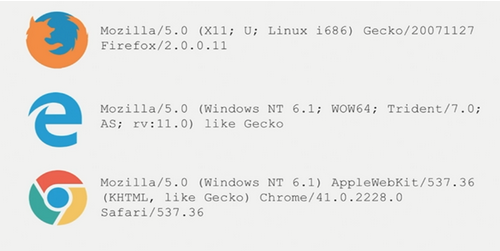

In [ ]:
opener.addheaders = [('User-Agent','...')]

In [76]:
# 查看csv文件前10行内容，格式
import csv
path = "E:/Python_test/pp2_20161010/votes.csv"
with open(path) as csvfile:
    for i,rows in enumerate(csvfile):
        if i< 10:
            row = rows
            print(i,rows)
        else:
            break

0 left_id,right_id,winner,left_lat,left_long,right_lat,right_long,category

1 513d2dbefdc9f03587002515,51413b2ffdc9f049260058ca,left,41.935385,-87.696485,34.047847,-118.236107,wealthy

2 513d7e23fdc9f0358700733a,513d7ac3fdc9f0358700693f,equal,40.744156,-73.93557900000002,-33.526384,-70.59130900000002,depressing

3 50f60c4dbeb2fed91000028d,513cb652fdc9f03587000a1e,right,45.505837,-122.58370500000001,29.752872,-95.29884400000003,depressing

4 513d9ff9fdc9f0358700887c,513cd544fdc9f03587001efc,left,33.747093,-84.28984300000002,-33.930831,18.406320999999934,depressing

5 513f320cfdc9f0358700e030,513cc3acfdc9f035870016c3,left,52.551685,13.416548000000034,29.763818,-95.39462100000003,safety

6 50f60b90beb2fed910000085,513d6debfdc9f0358700521f,left,45.50436,-122.61037499999998,39.780163,-104.95584300000002,safety

7 513d6a38fdc9f035870049cb,513e6b98fdc9f0358700c055,left,39.737314,-104.87407400000001,35.67577,139.88707499999998,safety

8 513da088fdc9f035870089c5,513d7bbefdc9f03587006c7c,right,-

##### urllib.request & requests

In [15]:
# urllib模块使用代理
import urllib.request as ur
proxy = 'https://165.138.225.250:8080'
# 创建一个ProxyHandler对象
proxy_handler = ur.ProxyHandler({'https':proxy})
# 创建一个opener对象
opener = ur.build_opener(proxy_handler)
# 设置user_agent
opener.addheaders = [('User-Agent','Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:58.0) Gecko/20100101 Firefox/58.0')]
# 给request装载opener
ur.install_opener(opener)
# 打开一个url
url = ur.urlopen("http://youyube.com",timeout = 120)

In [75]:
# rquests模块使用代理
import requests
from bs4 import BeautifulSoup
proxy = {'https':'https://165.138.225.250:8080'}
head = {'User-Agent':'Mozilla/5.0'}
url = requests.get("http://www.baidu.com",headers=head,proxies=proxy)

#print(url.text)
url.encoding='utf-8'
soup = BeautifulSoup(url.text,'html.parser')
#print(soup.prettify())

In [77]:
# Place Pulse Google街景图爬取
# 1.准备工作：载入包，定义存储目录，链接API
import urllib.request as ur
import time
import random
import requests

IMG_PATH = "E:/Python_test/Place_Google/Images/{}.jpg"
DATA_FILE = "E:/Python_test/Place_Google/Datas/votes.csv"
# 将已下载的图片id记录进txt文件中
STORED_IMG_ID_FILE = "E:/Python_test/Place_Google/Datas/images_id.txt"
# 生成已下载图片id列表,set()列表去重
STORED_IMG_IDS = set()
# Place Pulse Google API接口，输入经纬度{},{}
IMG_URL = 'https://maps.googleapis.com/maps/api/streetview?size=400x300&location={},{}'

# 2.应用爬虫技巧：使用代理服务器，User-Agent
# 代理服务器需及时更换~
#proxy_ip = 'https://165.138.225.250:8080'
#proxy = ur.ProxyHandler({'https':proxy_ip})
#opener = ur.build_opener(proxy)
#opener.addheaders = [('User-Agent','Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:58.0) Gecko/20100101 Firefox/58.0')]
#ur.install_opener(opener)

proxy = {'https':'https://165.138.225.250:8080'}
head = {'User-Agent':'Mozilla/5.0'}
url = requests.get(IMG_URL,headers=head,proxies=proxy)


# 3.读取图片id
with open(STORED_IMG_ID_FILE) as input_file:
    for line in input_file:
        # 去除首尾空格
        STORED_IMG_IDS.add(line.strip())

# 4.根据提供的图片id文档，进行Google街景图片的爬取
with open(DATA_FILE) as input_file:
    first_line = True
    for line in input_file:
        if first_line:
            first_line = False
            continue
        left_id,right_id,winner,left_lat,left_long,right_lat,right_long,category = line.split(',')
        if left_id not in STORED_IMG_IDS:
            print ('saving img {}...'.format(left_id))
            # 下载图片
            ur.urlretrieve(IMG_URL.format(left_lat,left_long),IMG_PATH.format(left_id))
            # 保存已下载的图片id
            STORED_IMG_IDS.add(left_id)
            with open(STORED_IMG_ID_FILE,'a') as output_file:
                output_file.write('{}\n'.format(left_id))
            # 随机休眠时间 1-10s
            time_stop = random.uniform(1,10)
            time.sleep(time_stop)
            
        if right_id not in STORED_IMG_IDS:
            print('saving img {}...'.format(right_id))
            ur.urlretrieve(IMG_URL.format(right_lat,right_long),IMG_PATH.format(right_id))
            STORED_IMG_IDS.add(right_id)
            with open(STORED_IMG_ID_FILE,'a') as output_file:
                output_file.write('{}\n'.format(right_id))
            time_stop = random.uniform(1,10)
            time.sleep(time_stop)

saving img 50f5e6fefdc9f065f0006eb2...
saving img 513d6d7efdc9f0358700516c...
saving img 513d57fefdc9f03587003271...
saving img 513e62a8fdc9f0358700b718...


KeyboardInterrupt: 

In [89]:
DATA_FILE = "E:/Python_test/Place_Google/Datas/votes.csv"
print(DATA_FILE)

E:/Python_test/Place_Google/Datas/votes.csv
